In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

In [5]:
# Load data
data = pd.read_csv("datasetFinal.csv")
data = data.drop(data.columns[0], axis=1)

In [6]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue
0,4,Jan,4,26.9,66,20,0,27.571429
1,5,Jan,5,26.1,71.5,20.6,0,27.571429
2,6,Jan,6,26.6,77.3,22.4,0,27.571429
3,7,Jan,7,26.5,83.8,23.3,0,27.571429
4,8,Jan,8,27.6,78.8,23.3,0,27.571429
5,9,Jan,9,28.2,76.8,23.3,0,27.571429
6,10,Jan,10,26.4,80.9,22.7,0,27.571429
7,11,Jan,11,26.7,78.7,22.6,0,42.714286
8,12,Jan,12,25.4,83.5,22.6,0,42.714286
9,13,Jan,13,26.9,77,22.1,0,42.714286


In [7]:
# One-hot encode the 'Month' column
data = pd.get_dummies(data, columns=['Month'])

In [8]:
# Convert non-numeric values to NaN and handle missing values
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

In [9]:
data.head(20)

,DayOfYear,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,4,4,26.9,66.0,20.0,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
1,5,5,26.1,71.5,20.6,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
2,6,6,26.6,77.3,22.4,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
3,7,7,26.5,83.8,23.3,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
4,8,8,27.6,78.8,23.3,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
5,9,9,28.2,76.8,23.3,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
6,10,10,26.4,80.9,22.7,0.0,27.571429,False,False,False,False,True,False,False,False,False,False,False,False
7,11,11,26.7,78.7,22.6,0.0,42.714286,False,False,False,False,True,False,False,False,False,False,False,False
8,12,12,25.4,83.5,22.6,0.0,42.714286,False,False,False,False,True,False,False,False,False,False,False,False
9,13,13,26.9,77.0,22.1,0.0,42.714286,False,False,False,False,True,False,False,False,False,False,False,False


In [10]:
# Create lag features for weather data
for lag in range(1, 15):
    data[f'Temperature_lag_{lag}'] = data['Temperature (°C)'].shift(lag)
    data[f'Humidity_lag_{lag}'] = data['Humidity (%)'].shift(lag)
    data[f'DewPoint_lag_{lag}'] = data['DewPoint'].shift(lag)
    data[f'Precipitation_lag_{lag}'] = data['Precipitation (mm)'].shift(lag)

# Create rolling statistics for dengue cases
data['Dengue_rolling_mean_14'] = data['Dengue'].rolling(window=14).mean()
data['Dengue_rolling_std_14'] = data['Dengue'].rolling(window=14).std()

In [11]:
data.head(20)

,DayOfYear,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Month_Apr,Month_Aug,Month_Dec,...,Temperature_lag_13,Humidity_lag_13,DewPoint_lag_13,Precipitation_lag_13,Temperature_lag_14,Humidity_lag_14,DewPoint_lag_14,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14
0,4,4,26.9,66.0,20.0,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5,26.1,71.5,20.6,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,6,26.6,77.3,22.4,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,7,26.5,83.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,8,27.6,78.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,9,28.2,76.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,10,26.4,80.9,22.7,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,11,26.7,78.7,22.6,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,12,25.4,83.5,22.6,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,13,26.9,77.0,22.1,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Create future target variables
forecast_days = 7
for i in range(1, forecast_days + 1):
    data[f'Dengue_future_{i}'] = data['Dengue'].shift(-i)

In [13]:
data.head(20)

,DayOfYear,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Month_Apr,Month_Aug,Month_Dec,...,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14,Dengue_future_1,Dengue_future_2,Dengue_future_3,Dengue_future_4,Dengue_future_5,Dengue_future_6,Dengue_future_7
0,4,4,26.9,66.0,20.0,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,27.571429,27.571429,42.714286
1,5,5,26.1,71.5,20.6,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,27.571429,42.714286,42.714286
2,6,6,26.6,77.3,22.4,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,42.714286,42.714286,42.714286
3,7,7,26.5,83.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,42.714286,42.714286,42.714286,42.714286
4,8,8,27.6,78.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,27.571429,42.714286,42.714286,42.714286,42.714286,42.714286
5,9,9,28.2,76.8,23.3,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,27.571429,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286
6,10,10,26.4,80.9,22.7,0.0,27.571429,False,False,False,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286
7,11,11,26.7,78.7,22.6,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286,28.571429
8,12,12,25.4,83.5,22.6,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,28.571429,28.571429
9,13,13,26.9,77.0,22.1,0.0,42.714286,False,False,False,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,28.571429,28.571429,28.571429


In [14]:
# Drop rows with NaN values
data = data.dropna()

In [15]:
data.head(20)

,DayOfYear,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Month_Apr,Month_Aug,Month_Dec,...,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14,Dengue_future_1,Dengue_future_2,Dengue_future_3,Dengue_future_4,Dengue_future_5,Dengue_future_6,Dengue_future_7
14,18,18,26.4,75.7,21.9,0.0,28.571429,False,False,False,...,0.0,35.214286,7.787352,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,20.285714
15,19,19,26.6,71.6,20.8,0.0,28.571429,False,False,False,...,0.0,35.285714,7.716117,28.571429,28.571429,28.571429,28.571429,28.571429,20.285714,20.285714
16,20,20,27.1,68.9,20.8,0.0,28.571429,False,False,False,...,0.0,35.357143,7.643499,28.571429,28.571429,28.571429,28.571429,20.285714,20.285714,20.285714
17,21,21,27.8,66.9,21.0,0.0,28.571429,False,False,False,...,0.0,35.428571,7.569459,28.571429,28.571429,28.571429,20.285714,20.285714,20.285714,20.285714
18,22,22,27.5,72.5,22.1,0.0,28.571429,False,False,False,...,0.0,35.500000,7.493954,28.571429,28.571429,20.285714,20.285714,20.285714,20.285714,20.285714
19,23,23,27.8,77.4,23.0,0.0,28.571429,False,False,False,...,0.0,35.571429,7.416939,28.571429,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714
20,24,24,27.0,73.1,21.8,0.0,28.571429,False,False,False,...,0.0,35.642857,7.338368,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714
21,25,25,27.4,63.9,19.4,0.0,20.285714,False,False,False,...,0.0,34.040816,8.085964,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714,16.857143
22,26,26,26.9,63.9,19.1,0.0,20.285714,False,False,False,...,0.0,32.438776,8.449028,20.285714,20.285714,20.285714,20.285714,20.285714,16.857143,16.857143
23,27,27,27.0,63.4,19.4,0.0,20.285714,False,False,False,...,0.0,30.836735,8.477111,20.285714,20.285714,20.285714,20.285714,16.857143,16.857143,16.857143


In [16]:
# Prepare data for training
X = data[
    [f'Temperature_lag_{i}' for i in range(1, 15)] +
    [f'Humidity_lag_{i}' for i in range(1, 15)] +
    [f'DewPoint_lag_{i}' for i in range(1, 15)] +
    [f'Precipitation_lag_{i}' for i in range(1, 15)] +
    ['Dengue_rolling_mean_14', 'Dengue_rolling_std_14']
]
y = data['Dengue_future_7']

In [17]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest MAE: {mean_absolute_error(Y_test, rf_y_pred)}")
print(f"Random Forest MSE: {mean_squared_error(Y_test, rf_y_pred)}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(Y_test, rf_y_pred))}")
print(f"Random Forest R^2: {r2_score(Y_test, rf_y_pred)}")

Random Forest MAE: 6.943282031044461
Random Forest MSE: 161.28071704626623
Random Forest RMSE: 12.699634524121796
Random Forest R^2: 0.873573337517353


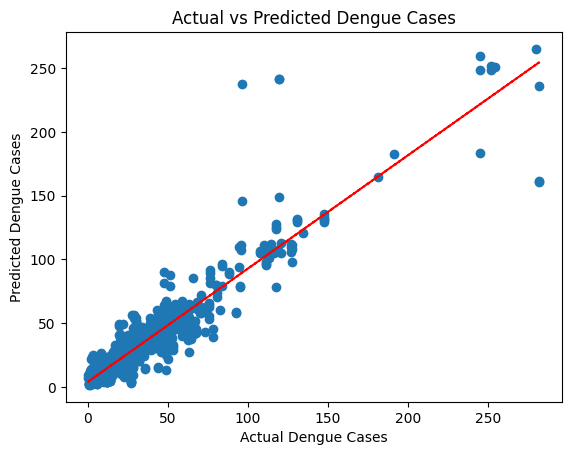

In [19]:
plt.scatter(Y_test, rf_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, rf_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()

In [20]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_y_pred = gb_model.predict(X_test)
print(f"Gradient Boosting MAE: {mean_absolute_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting MSE: {mean_squared_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(Y_test, gb_y_pred))}")
print(f"Gradient Boosting R^2: {r2_score(Y_test, gb_y_pred)}")

Gradient Boosting MAE: 7.7210415846358424
Gradient Boosting MSE: 177.2299424583041
Gradient Boosting RMSE: 13.312773657593075
Gradient Boosting R^2: 0.8610708674455656


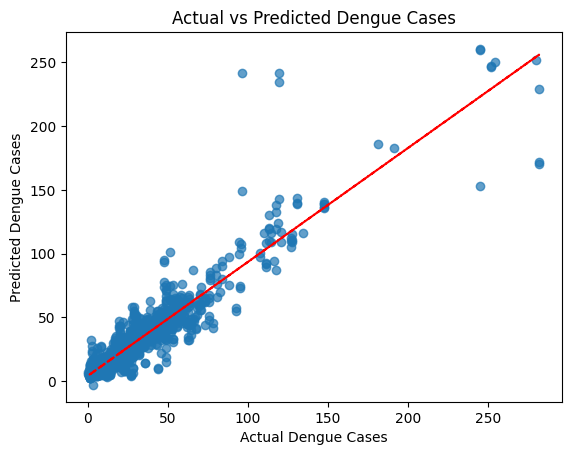

In [21]:
plt.scatter(Y_test, gb_y_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, gb_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()


In [22]:
# Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, Y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mape = np.mean(np.abs((Y_test - nn_y_pred) / Y_test)) * 100

print(f"Neural Network MAE: {mean_absolute_error(Y_test, nn_y_pred)}")
print(f"Neural Network MSE: {mean_squared_error(Y_test, nn_y_pred)}")
print(f"Neural Network RMSE: {np.sqrt(mean_squared_error(Y_test, nn_y_pred))}")
print(f"Neural Network R^2: {r2_score(Y_test, nn_y_pred)}")
print(f"Neural Network MAPE: {nn_mape}")

Neural Network MAE: 8.409045212410957
Neural Network MSE: 166.8946753653445
Neural Network RMSE: 12.918772208121966
Neural Network R^2: 0.8691726005501795
Neural Network MAPE: 68.0951134167237


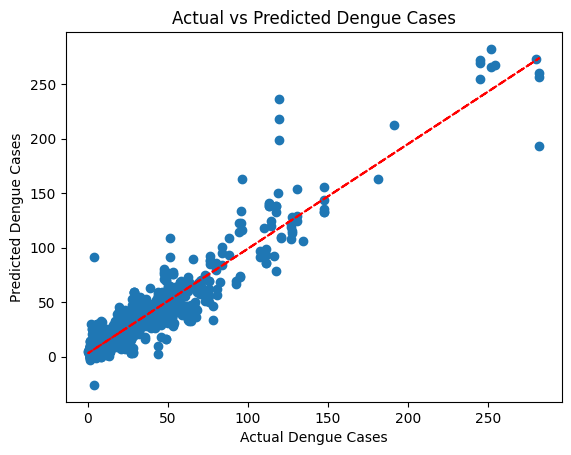

In [23]:
plt.scatter(Y_test, nn_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, nn_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()

In [24]:
# Outlier Detection and Removal
z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).all(axis=1)
X_clean = X[~outliers]
y_clean = y[~outliers]
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)


In [25]:
# Re-train Gradient Boosting Regressor after outlier removal
gb_model.fit(X_train, Y_train)
gb_y_pred = gb_model.predict(X_test)
print(f"Gradient Boosting MAE (cleaned): {mean_absolute_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting MSE (cleaned): {mean_squared_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting RMSE (cleaned): {np.sqrt(mean_squared_error(Y_test, gb_y_pred))}")
print(f"Gradient Boosting R^2 (cleaned): {r2_score(Y_test, gb_y_pred)}")

Gradient Boosting MAE (cleaned): 7.717478764775399
Gradient Boosting MSE (cleaned): 176.3667880737678
Gradient Boosting RMSE (cleaned): 13.28031581227524
Gradient Boosting R^2 (cleaned): 0.8617474872550676


In [26]:
baseline_prediction = np.mean(Y_train)
baseline_mae = mean_absolute_error(Y_test, [baseline_prediction] * len(Y_test))
print(f"Baseline MAE: {baseline_mae}")

Baseline MAE: 23.5074960014782


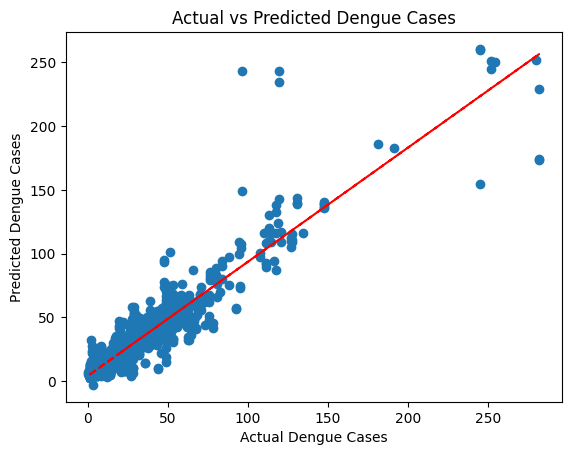

In [27]:
plt.scatter(Y_test, gb_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, gb_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()


In [28]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-rf_cv_scores.mean()}")


Random Forest Cross-Validation MSE: 399.6637226081699


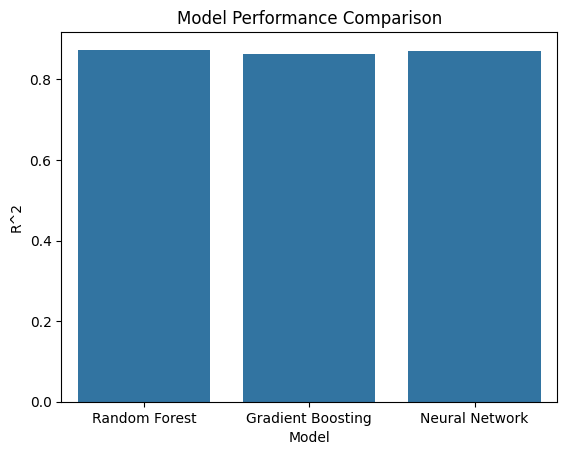

In [29]:
import seaborn as sns

results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Neural Network'],
    'MAE': [mean_absolute_error(Y_test, rf_y_pred),
           mean_absolute_error(Y_test, gb_y_pred),
           mean_absolute_error(Y_test, nn_y_pred)],
    'MSE': [mean_squared_error(Y_test, rf_y_pred),
           mean_squared_error(Y_test, gb_y_pred),
           mean_squared_error(Y_test, nn_y_pred)],
    'RMSE': [np.sqrt(mean_squared_error(Y_test, rf_y_pred)),
             np.sqrt(mean_squared_error(Y_test, gb_y_pred)),
             np.sqrt(mean_squared_error(Y_test, nn_y_pred))],
    'R^2': [r2_score(Y_test, rf_y_pred),
            r2_score(Y_test, gb_y_pred),
            r2_score(Y_test, nn_y_pred)]
})

sns.barplot(x='Model', y='R^2', data=results)
plt.title('Model Performance Comparison')
plt.show()


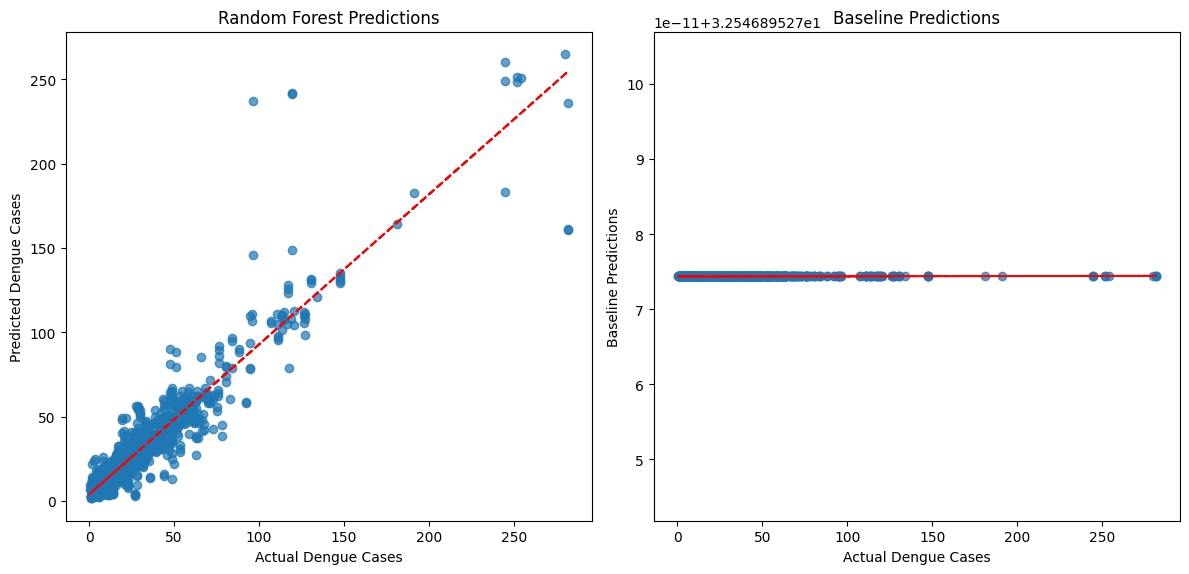

In [30]:
plt.figure(figsize=(12, 6))

# Random Forest Model
plt.subplot(1, 2, 1)
plt.scatter(Y_test, rf_y_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, rf_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Random Forest Predictions')

# Baseline Model
baseline_pred = np.mean(Y_train)
baseline_pred = [baseline_pred] * len(Y_test)
plt.subplot(1, 2, 2)
plt.scatter(Y_test, baseline_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, baseline_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Baseline Predictions')
plt.title('Baseline Predictions')

plt.tight_layout()
plt.show()


In [31]:
# Save the model and scaler
import joblib
joblib.dump(rf_model, 'random_forest_model3.h5')


['random_forest_model3.h5']

In [32]:
# Save the model and scaler
joblib.dump(gb_model, 'gradient_boosting_model3.h5')

['gradient_boosting_model3.h5']

In [33]:
# Save the model and scaler
joblib.dump(nn_model, 'neural_network_model3.h5')

['neural_network_model3.h5']

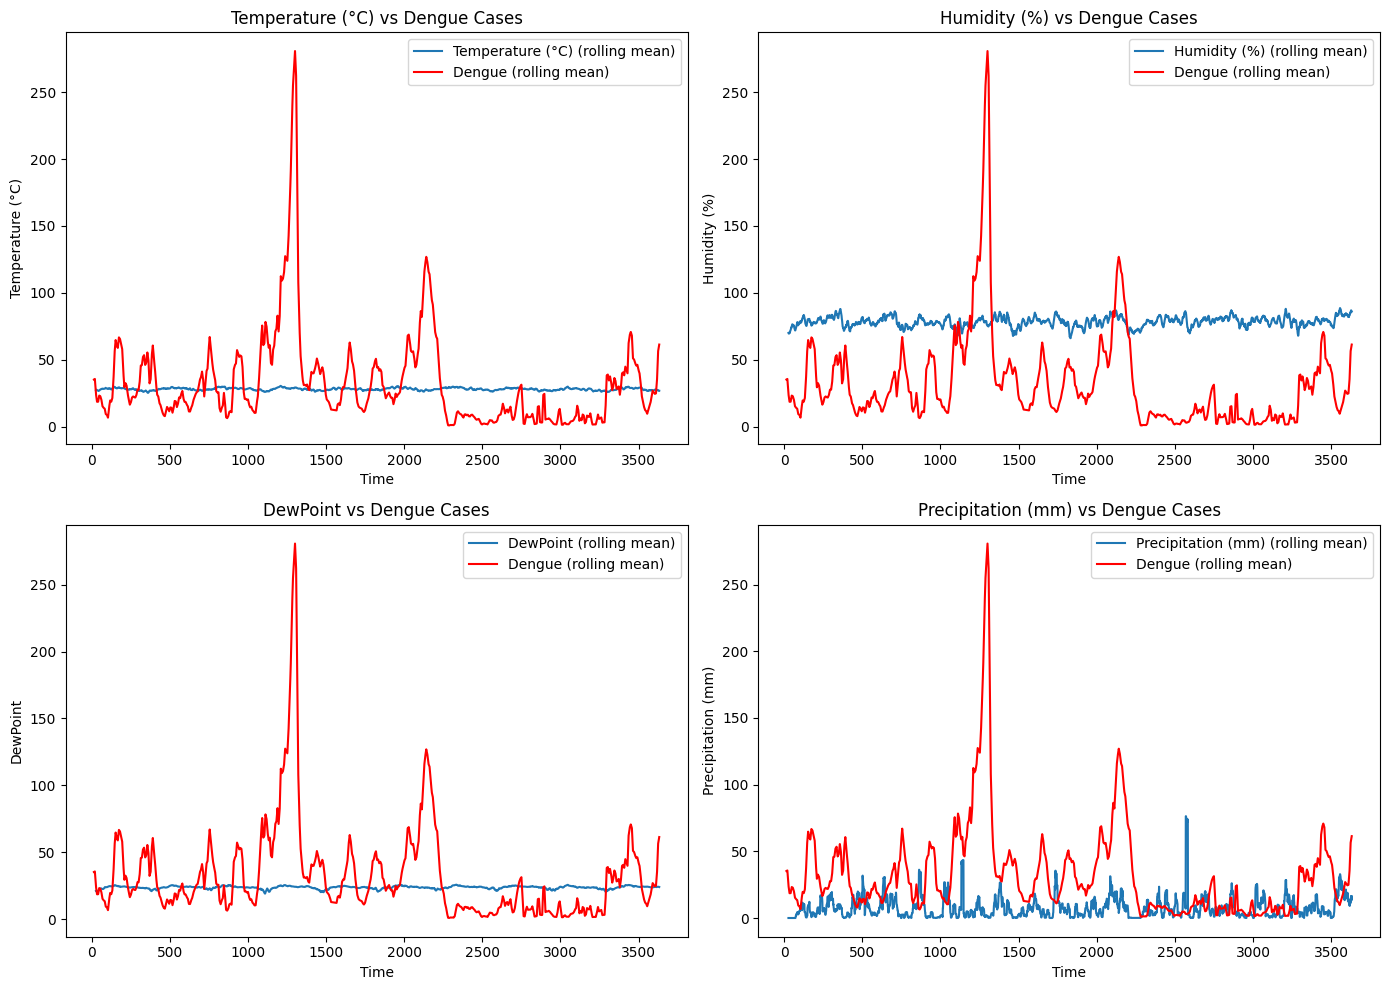

In [34]:
# Plotting correlation between weather variables and dengue cases using rolling mean
weather_vars = ['Temperature (°C)', 'Humidity (%)', 'DewPoint', 'Precipitation (mm)']
plt.figure(figsize=(14, 10))
for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 2, i)
    data[var + '_rolling'] = data[var].rolling(window=14).mean()
    plt.plot(data.index, data[var + '_rolling'], label=f'{var} (rolling mean)')
    plt.plot(data.index, data['Dengue_rolling_mean_14'], label='Dengue (rolling mean)', color='red')
    plt.title(f'{var} vs Dengue Cases')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

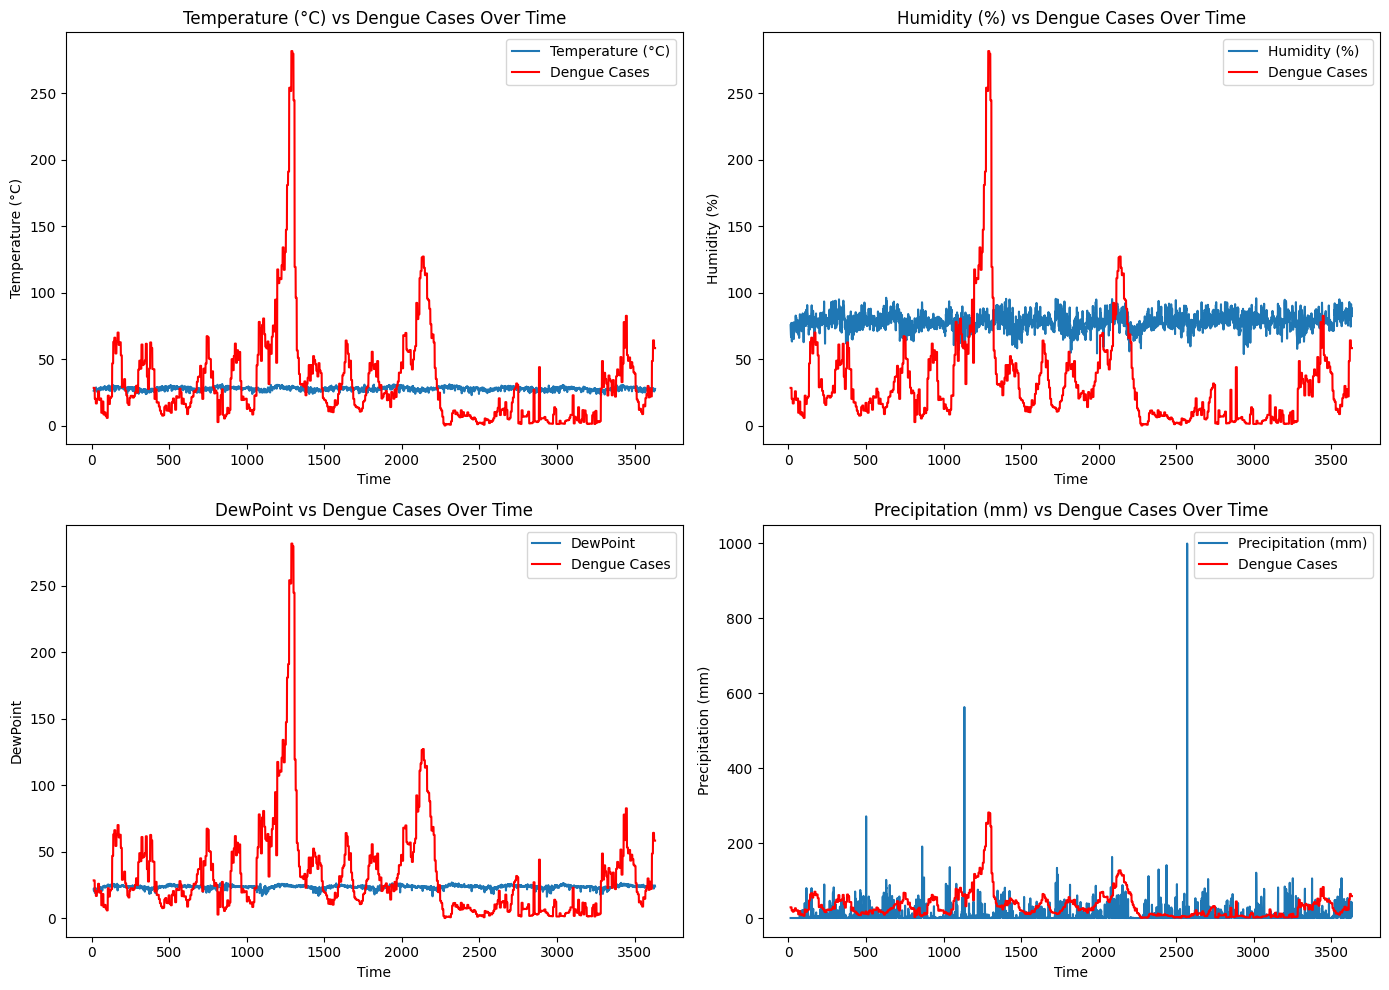

In [35]:
# Plotting correlation between actual weather variables and dengue cases over time
weather_vars = ['Temperature (°C)', 'Humidity (%)', 'DewPoint', 'Precipitation (mm)']
plt.figure(figsize=(14, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 2, i)
    plt.plot(data.index, data[var], label=var)
    plt.plot(data.index, data['Dengue'], label='Dengue Cases', color='red')
    plt.title(f'{var} vs Dengue Cases Over Time')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()


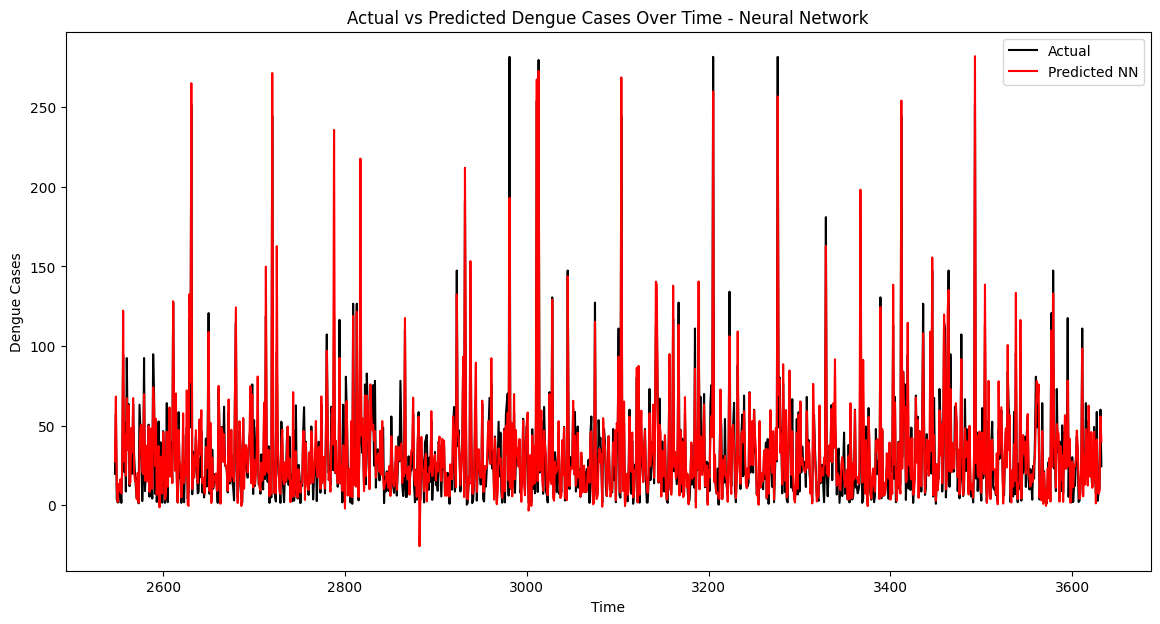

In [36]:
# Plotting predicted vs actual dengue cases over time for the Neural Network model
plt.figure(figsize=(14, 7))

# Plot actual dengue cases
plt.plot(data.index[-len(Y_test):], Y_test, label='Actual', color='black')

# Plot predicted dengue cases by the Neural Network model
plt.plot(data.index[-len(Y_test):], nn_y_pred, label='Predicted NN', color='red')

plt.title('Actual vs Predicted Dengue Cases Over Time - Neural Network')
plt.xlabel('Time')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()


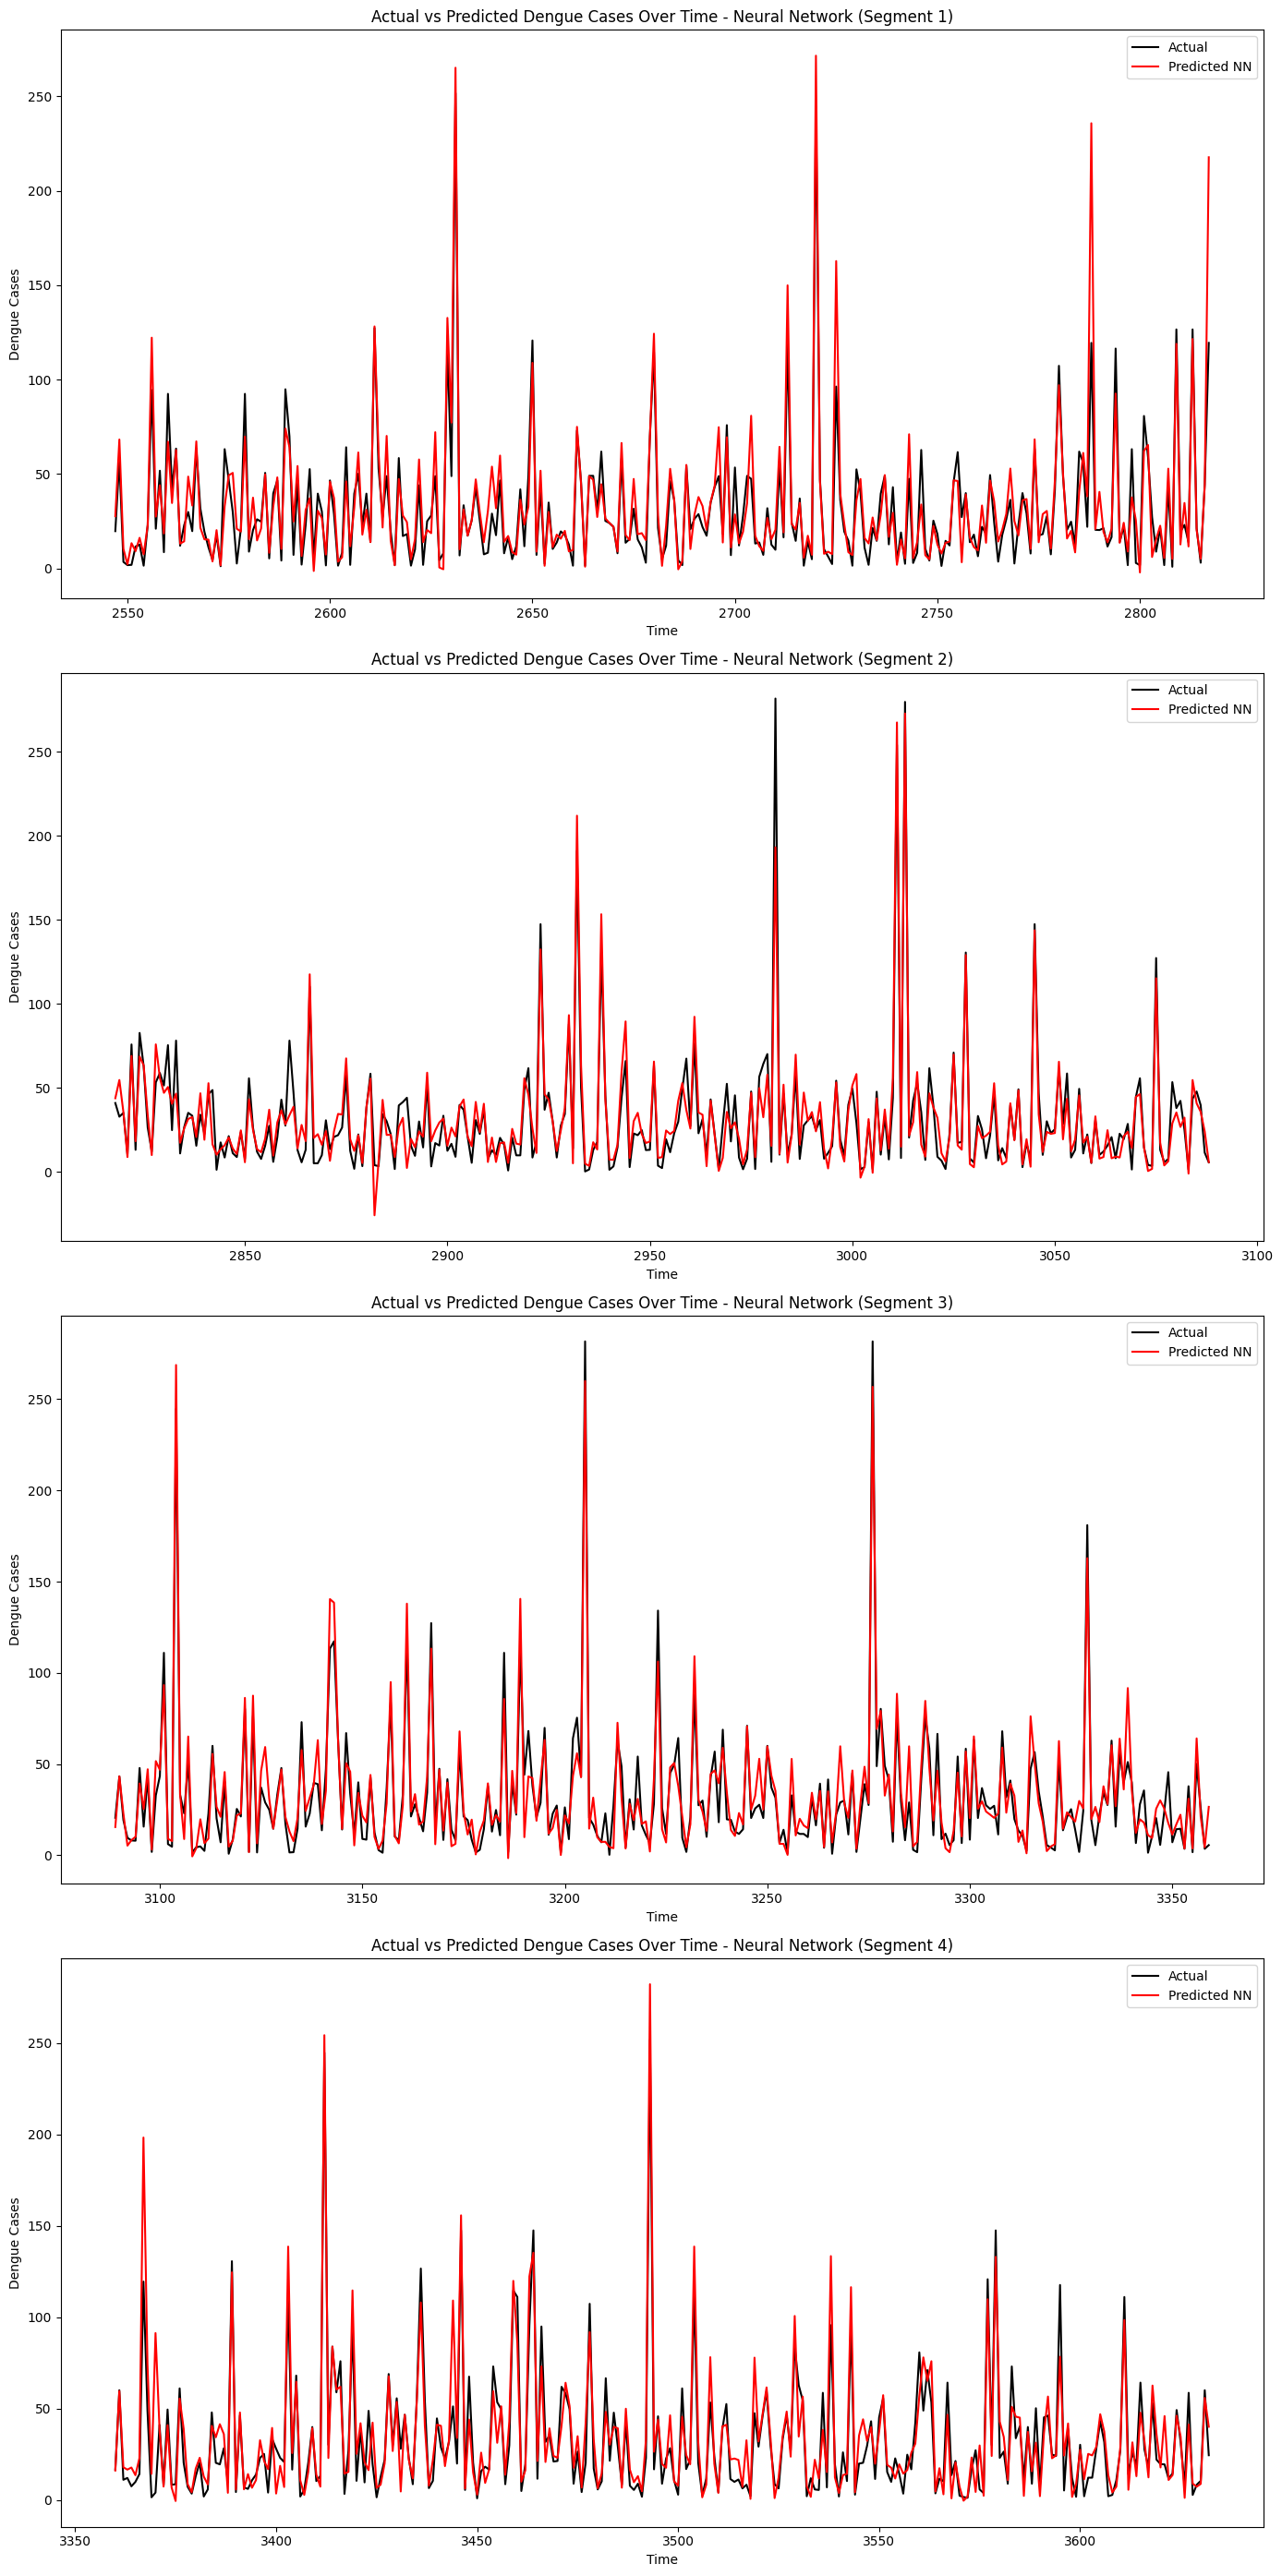

In [37]:
import matplotlib.pyplot as plt

# Define the number of plots (e.g., quarterly)
num_plots = 4
split_size = len(Y_test) // num_plots

plt.figure(figsize=(14, 7 * num_plots))

# Plot each segment
for i in range(num_plots):
    start_index = i * split_size
    end_index = (i + 1) * split_size if i != num_plots - 1 else len(Y_test)

    plt.subplot(num_plots, 1, i + 1)
    plt.plot(data.index[-len(Y_test):][start_index:end_index], Y_test[start_index:end_index], label='Actual', color='black')
    plt.plot(data.index[-len(Y_test):][start_index:end_index], nn_y_pred[start_index:end_index], label='Predicted NN', color='red')

    plt.title(f'Actual vs Predicted Dengue Cases Over Time - Neural Network (Segment {i + 1})')
    plt.xlabel('Time')
    plt.ylabel('Dengue Cases')
    plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Compute the deviation for Neural Network predictions
deviation_nn = nn_y_pred - Y_test.values
print(f"deviation_nn: {deviation_nn}")

deviation_nn: [ 7.9036462  10.95599181  6.90351397 ... -1.67959564 -4.20961706
 15.58591192]


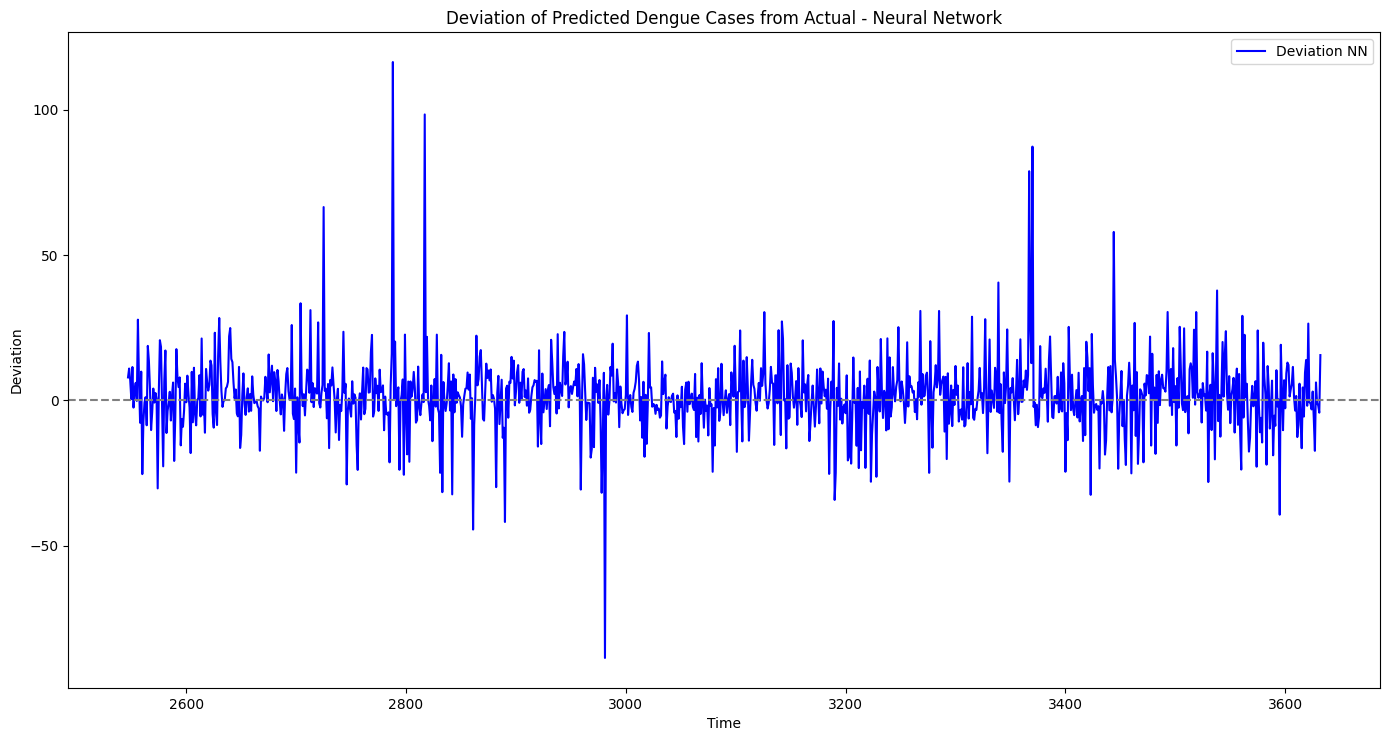

In [39]:
plt.figure(figsize=(14, 35))


# Plot the deviation
plt.subplot(num_plots + 1, 1, num_plots + 1)
plt.plot(data.index[-len(Y_test):], deviation_nn, label='Deviation NN', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Deviation of Predicted Dengue Cases from Actual - Neural Network')
plt.xlabel('Time')
plt.ylabel('Deviation')
plt.legend()

plt.tight_layout()
plt.show()
